In [1]:
import pandas as pd
import sqlite3
import math
import datetime 
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))


In [2]:
conn = sqlite3.connect('database.db')

In [3]:
c = conn.cursor()

# Desain Database
<img src="DW Database.jpg" >

In [4]:

c.executescript('drop table if exists product')
c.executescript('drop table if exists customer')
c.executescript('drop table if exists transactions')
c.execute("CREATE TABLE IF NOT EXISTS 'product' ('product_category_code' INT, 'product_category' VARCHAR(255) NULL,  PRIMARY KEY ('product_category_code'))")
c.execute("CREATE TABLE IF NOT EXISTS 'customer' ('id_customer' INT, 'date_of_birth' VARCHAR(255) NULL, 'gender' VARCHAR(255) NULL, PRIMARY KEY ('id_customer'))")
c.execute("CREATE TABLE IF NOT EXISTS 'transactions' ( 'id_transactions' INT, 'id_customer' INT NOT NULL, 'transaction_date' date NULL, 'product_category_code' INT NOT NULL, 'store_type' VARCHAR(255) NULL, FOREIGN KEY ('id_customer') REFERENCES 'customer' ('id_customer') ON DELETE NO ACTION ON UPDATE NO ACTION, FOREIGN KEY ('product_category_code') REFERENCES 'product' ('product_category_code') ON DELETE NO ACTION ON UPDATE NO ACTION)")

In [5]:
df = pd.read_csv('Transactions_clean.csv')
df

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,97439039119,272357,23-02-2014,8,3,-2,-824,173.040,-1821.040,TeleShop
...,...,...,...,...,...,...,...,...,...,...
23034,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop
23035,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop
23036,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR
23037,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop


In [6]:
df2 = pd.read_csv('product.csv')
df2

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women
5,2,Footwear,4,Kids
6,3,Electronics,4,Mobiles
7,3,Electronics,5,Computers
8,3,Electronics,8,Personal Appliances
9,3,Electronics,9,Cameras


In [7]:
df3 = pd.read_csv('customer.csv')
df3

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0
...,...,...,...,...
5642,274474,19-12-1992,M,2.0
5643,267666,24-12-1992,M,6.0
5644,270476,25-12-1992,F,3.0
5645,269626,27-12-1992,F,5.0


In [8]:
customer = []
product = []
transactions = []

for i,j in df2.iterrows():
    if [j[0],j[1]] not in product :
        product.append([j[0],j[1]])
        
for i,j in df3.iterrows():
    if [j[0],j[1],j[2]] not in customer :
        customer.append([j[0],j[1],j[2]])        
        

for i,j in df.iterrows():
    if j[9] == "TeleShop" :
            if [j[0],j[1],datetime.datetime.strptime(j[2].replace('/','-'), '%d-%m-%Y').strftime('%Y-%m-%d'),j[4],j[9]] not in transactions :
                transactions.append([j[0],j[1],datetime.datetime.strptime(j[2].replace('/','-'), '%d-%m-%Y').strftime('%Y-%m-%d'),j[4],j[9]]) 
                
                            

In [9]:

c.execute("DELETE FROM customer")
for index, i in enumerate(customer): 
        c.execute("INSERT INTO customer values({},'{}','{}')".format(i[0],i[1],i[2]))

c.execute("DELETE FROM product")
for index, i in enumerate(product): 
        c.execute("INSERT INTO product values({},'{}')".format(i[0],i[1]))

c.execute("DELETE FROM transactions")
for index, i in enumerate(transactions):
    c.execute("INSERT INTO transactions values({},{},'{}',{},'{}')".format(i[0],i[1],i[2],i[3],i[4]))           
     

conn.commit()

In [10]:
c.execute('''SELECT * FROM customer''')
TampilCustomer = []
for row in c.fetchall():
    TampilCustomer.append(row)
print("========================Customer================================")
print(TampilCustomer)
print("============================================================")

c.execute('''SELECT * FROM product''')
TampilProduct = []
for row in c.fetchall():
    TampilProduct.append(row)
print("========================Product================================")
print(TampilProduct)
print("============================================================")

c.execute('''SELECT * FROM transactions''')
TampilTransactions = []
for row in c.fetchall():
    TampilTransactions.append(row)
print("========================Transactions================================")
print(TampilTransactions)
print("============================================================")



========================Customer================================
[(268408, '02-01-1970', 'M'), (269696, '07-01-1970', 'F'), (268159, '08-01-1970', 'F'), (270181, '10-01-1970', 'F'), (268073, '11-01-1970', 'M'), (273216, '15-01-1970', 'F'), (266929, '15-01-1970', 'M'), (275152, '16-01-1970', 'M'), (275034, '18-01-1970', 'F'), (273966, '21-01-1970', 'M'), (270829, '22-01-1970', 'F'), (266997, '23-01-1970', 'M'), (272455, '25-01-1970', 'M'), (274593, '26-01-1970', 'M'), (273391, '29-01-1970', 'F'), (267657, '29-01-1970', 'F'), (271344, '29-01-1970', 'F'), (268275, '01-02-1970', 'F'), (274630, '01-02-1970', 'M'), (273541, '01-02-1970', 'M'), (270324, '01-02-1970', 'F'), (273613, '06-02-1970', 'M'), (271608, '09-02-1970', 'F'), (269008, '13-02-1970', 'F'), (267199, '14-02-1970', 'nan'), (267916, '17-02-1970', 'F'), (267609, '18-02-1970', 'M'), (270602, '18-02-1970', 'M'), (272883, '19-02-1970', 'M'), (272359, '19-02-1970', 'M'), (272603, '19-02-1970', 'F'), (272028, '20-02-1970', 'F'), (274

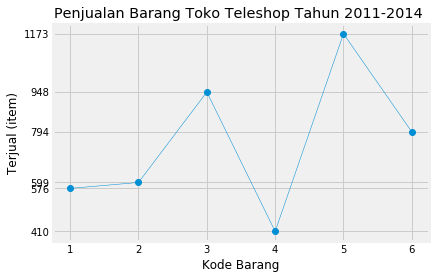

,Kode Barang,Terjual (item)
1,1,576
2,2,599
3,3,948
4,4,410
5,5,1173
6,6,794


In [11]:

c.execute('''

Select product_category_code, count(id_customer) from transactions group by product_category_code
          ''')

product_tahun = []
for row in c.fetchall():
    product_tahun.append(row)  

product_tahun    
    
np_tahun_produk = np.array(product_tahun)
plt.plot([ str(x[0]) for x in np_tahun_produk[:,:]], [ int(x[1]) for x in np_tahun_produk[:,:]],'-o',linewidth=0.5)
plt.xticks([ str(x[0]) for x in np_tahun_produk[:,:]], [ str(x[0]) for x in np_tahun_produk[:,:]])
plt.yticks([ int(x[1]) for x in np_tahun_produk[:,:]], [ int(x[1]) for x in np_tahun_produk[:,:]])
plt.xlabel('Kode Barang')
plt.ylabel('Terjual (item)')
plt.title("Penjualan Barang Toko Teleshop Tahun 2011-2014 ")
plt.show()

df = pd.DataFrame([ x for x in np_tahun_produk[:,:]])
df.columns = ['Kode Barang', 'Terjual (item)']
df.index = np.arange(1,len(df)+1)
df

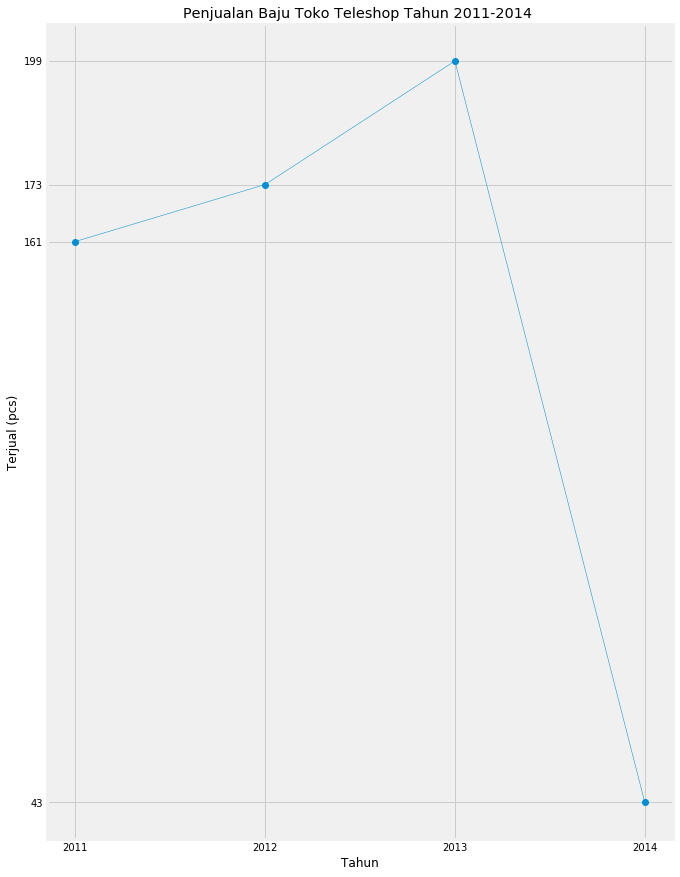

,Tahun,Terjual (pcs)
1,2011,161
2,2012,173
3,2013,199
4,2014,43


In [12]:
#VISUALISASI 

c.execute('''

SELECT strftime('%Y', transaction_date), count (id_customer) from transactions where product_category_code = 1
group by strftime('%Y', transaction_date)

          ''')

product_tahun = []
for row in c.fetchall():
    product_tahun.append(row)  
    
product_tahun

np_tahun_produk = np.array(product_tahun)
plt.figure(figsize=(10,15))
plt.plot([ str(x[0]) for x in np_tahun_produk[:,:]], [ int(x[1]) for x in np_tahun_produk[:,:]],'-o',linewidth=0.5)
plt.xticks([ str(x[0]) for x in np_tahun_produk[:,:]], [ str(x[0]) for x in np_tahun_produk[:,:]])
plt.yticks([ int(x[1]) for x in np_tahun_produk[:,:]], [ int(x[1]) for x in np_tahun_produk[:,:]])
plt.xlabel('Tahun')
plt.ylabel('Terjual (pcs)')
plt.title("Penjualan Baju Toko Teleshop Tahun 2011-2014 ")
plt.show()

df = pd.DataFrame([ x for x in np_tahun_produk[:,:]])
df.columns = ['Tahun', 'Terjual (pcs)']
df.index = np.arange(1,len(df)+1)
df